# NFL Receiver's Yardage -- A Machine Learning Model
    

## Objectives

* Use scikit-learn to implement Multiple Linear Regression in an NFL context
* Create a model, train it, test it and use the model to predict future receiver performance


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Understanding the Data</a></li>
        <li><a href="#multiple_regression_model">Multiple Regression Machine Learning Model</a></li>
        <li><a href="#prediction">Prediction</a></li>
    </ol>
</div>
<br>
<hr>


### Importing Needed packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Data Source
The data in this project is found at https://github.com/nflverse/nflverse-data/releases/tag/player_stats



<h2 id="understanding_data">Understanding the Data</h2>
<a id="understanding-data"></a>

### `player_stats.csv`:
I have downloaded an NFL player dataset, **`player_stats.csv`**, which contains various game stats for NFL players from 1999 to 2023. 

- **player_id** e.g. 00-0000003
- **player_display_name** e.g. Abdul-Karim al-Jabbar
- **position** e.g. RB
- **position_group** e.g. SPEC
- **headshot_url** e.g. https://static.www.nfl.com/image/private/f_auto,q_auto/league/dypn7kf7fsaz30ey0ayc
- **recent_team** e.g MIA
- **season** e.g. 1999
- **week** e.g. 1
- **season_type** e.g. REG
- **opponent_team** e.g. DEN
- **receptions** e.g. 3
- **targets** e.g. 4
- **receiving_yards** e.g 49
- **receiving_tds** e.g. 1
- **receiving_air_yards** e.g. 35
- **receiving_yards_after_catch** e.g. 14
- **receiving_epa** e.g. 0.2923
- **target_share** e.g. 0.0526
- **wopr** e.g. 1.2830 (weighted opportunity rating)


<h2 id="reading_data">Reading the data in</h2>


In [3]:
df = pd.read_csv("C:/Users/noahd/Downloads/player_stats.csv")

# take a look at the dataset
df.head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,MIA,1999,1,REG,...,0,0.292378,0,0.0,0.052632,NaN,NaN,0,12.7,13.7
1,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,MIA,1999,2,REG,...,1,0.377009,0,0.0,0.117647,NaN,NaN,0,5.1,8.1
2,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,MIA,1999,4,REG,...,0,-0.699578,0,NaN,0.023810,NaN,NaN,0,0.2,0.2
3,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,CLE,1999,7,REG,...,0,-0.228454,0,0.0,0.050000,NaN,NaN,0,3.5,5.5
4,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,CLE,1999,8,REG,...,0,NaN,0,NaN,NaN,NaN,NaN,0,3.9,3.9


In [4]:
# replacing NaN values with 0
df = df.fillna(0)
df.head()


,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,00-0000003,0,Abdul-Karim al-Jabbar,RB,RB,0,MIA,1999,1,REG,...,0,0.292378,0,0.0,0.052632,0.0,0.0,0,12.7,13.7
1,00-0000003,0,Abdul-Karim al-Jabbar,RB,RB,0,MIA,1999,2,REG,...,1,0.377009,0,0.0,0.117647,0.0,0.0,0,5.1,8.1
2,00-0000003,0,Abdul-Karim al-Jabbar,RB,RB,0,MIA,1999,4,REG,...,0,-0.699578,0,0.0,0.023810,0.0,0.0,0,0.2,0.2
3,00-0000003,0,Abdul-Karim al-Jabbar,RB,RB,0,CLE,1999,7,REG,...,0,-0.228454,0,0.0,0.050000,0.0,0.0,0,3.5,5.5
4,00-0000003,0,Abdul-Karim al-Jabbar,RB,RB,0,CLE,1999,8,REG,...,0,0.000000,0,0.0,0.000000,0.0,0.0,0,3.9,3.9


Let's make a column for each player's stats the last 10 games.

In [5]:
stats = ['receptions', 'targets', 'receiving_yards', 'receiving_air_yards', 'receiving_yards_after_catch', 
         'receiving_epa', 'target_share', 'wopr']

# Calculate the 10-game rolling average for each player and stat
for stat in stats:
    df[f'{stat}_L10'] = df.groupby('player_id')[stat].shift(1).rolling(window=10, min_periods=1).mean().reset_index(level=0, drop=True)

# replacing NaN values with 0
df = df.fillna(0)

# Now, df will have new columns like 'receptions_L10', 'targets_L10', etc., 
# which represent the 10-game rolling average for each stat
df.head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,fantasy_points,fantasy_points_ppr,receptions_L10,targets_L10,receiving_yards_L10,receiving_air_yards_L10,receiving_yards_after_catch_L10,receiving_epa_L10,target_share_L10,wopr_L10
0,00-0000003,0,Abdul-Karim al-Jabbar,RB,RB,0,MIA,1999,1,REG,...,12.7,13.7,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,00-0000003,0,Abdul-Karim al-Jabbar,RB,RB,0,MIA,1999,2,REG,...,5.1,8.1,1.000000,1.0,7.000000,0.0,0.0,0.292378,0.052632,0.0
2,00-0000003,0,Abdul-Karim al-Jabbar,RB,RB,0,MIA,1999,4,REG,...,0.2,0.2,2.000000,2.5,12.500000,0.0,0.0,0.334694,0.085139,0.0
3,00-0000003,0,Abdul-Karim al-Jabbar,RB,RB,0,CLE,1999,7,REG,...,3.5,5.5,1.333333,2.0,8.333333,0.0,0.0,-0.010064,0.064696,0.0
4,00-0000003,0,Abdul-Karim al-Jabbar,RB,RB,0,CLE,1999,8,REG,...,3.9,3.9,1.500000,2.0,8.250000,0.0,0.0,-0.064661,0.061022,0.0


Let's select some features that we want to use for regression.


In [9]:
# Filter the dataframe to include only RBs, FBs, WRs, and TEs
df = df[df['position'].isin(['RB', 'FB', 'WR', 'TE'])]

cdf = df[['player_id', 'player_display_name', 'receptions', 'targets', 'receiving_yards', 'receiving_tds', 
                   'receiving_air_yards', 'receiving_yards_after_catch', 'receiving_epa', 'target_share', 
                   'wopr', 'receptions_L10', 'targets_L10', 'receiving_air_yards_L10', 
                   'receiving_yards_after_catch_L10', 'receiving_epa_L10', 'target_share_L10', 
                   'wopr_L10', 'receiving_yards_L10']]
cdf.head()

,player_id,player_display_name,receptions,targets,receiving_yards,receiving_tds,receiving_air_yards,receiving_yards_after_catch,receiving_epa,target_share,wopr,receptions_L10,targets_L10,receiving_air_yards_L10,receiving_yards_after_catch_L10,receiving_epa_L10,target_share_L10,wopr_L10,receiving_yards_L10
0,00-0000003,Abdul-Karim al-Jabbar,1,1,7,0,0,0,0.292378,0.052632,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
1,00-0000003,Abdul-Karim al-Jabbar,3,4,18,0,0,0,0.377009,0.117647,0.0,1.000000,1.0,0.0,0.0,0.292378,0.052632,0.0,7.000000
2,00-0000003,Abdul-Karim al-Jabbar,0,1,0,0,0,0,-0.699578,0.023810,0.0,2.000000,2.5,0.0,0.0,0.334694,0.085139,0.0,12.500000
3,00-0000003,Abdul-Karim al-Jabbar,2,2,8,0,0,0,-0.228454,0.050000,0.0,1.333333,2.0,0.0,0.0,-0.010064,0.064696,0.0,8.333333
4,00-0000003,Abdul-Karim al-Jabbar,0,0,0,0,0,0,0.000000,0.000000,0.0,1.500000,2.0,0.0,0.0,-0.064661,0.061022,0.0,8.250000


Let's plot receiving yards values with respect to target share in the last 10 games:


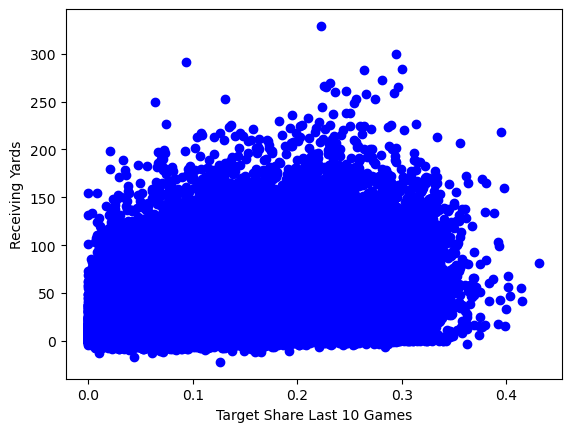

In [11]:
plt.scatter(cdf.target_share_L10, cdf.receiving_yards,  color='blue')
plt.xlabel("Target Share Last 10 Games")
plt.ylabel("Receiving Yards")
plt.show()

#### Creating train and test dataset
The process of splitting data into training and testing sets involves dividing the dataset into two separate parts: one for training and one for testing. These sets are mutually exclusive, meaning the data in one set is not used in the other. Training is done on the training set, while the testing set is used to evaluate the model.

This approach helps in assessing the model's performance on new, unseen data, providing a more accurate measure of its out-of-sample accuracy. Since the testing data was not used during the training phase, it offers a genuine test of how well the model generalizes to new examples.

The outcomes of the testing dataset are known, making it ideal for evaluation. As this data was not part of the training process, the model has no prior knowledge of these outcomes, ensuring that the testing is truly out-of-sample.

To proceed, we'll split our dataset so that approximately 80% is allocated for training and 20% for testing. We’ll create a mask to randomly select rows using the __np.random.rand()__ function.

In [12]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution


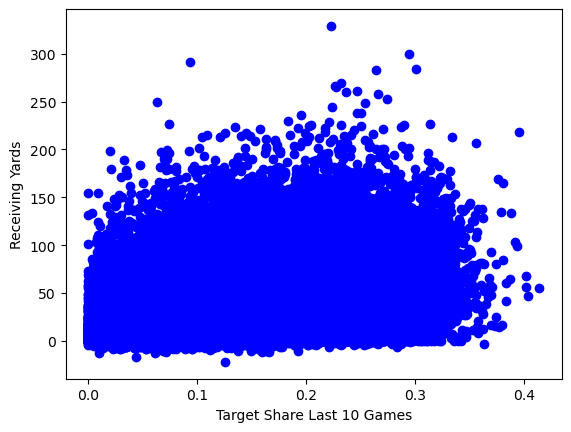

In [13]:
plt.scatter(train.target_share_L10, train.receiving_yards,  color='blue')
plt.xlabel("Target Share Last 10 Games")
plt.ylabel("Receiving Yards")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>
<a id="multiple_regression_model"></a>

In reality, there are multiple variables that impact receiving yards. When more than one independent variable is present, we use multiple linear regression. An example of multiple linear regression is predicting receiving yards using the features target_share, opponent_team, and receiving_epa of players.


In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['receptions_L10', 'targets_L10',
       'receiving_air_yards_L10', 'receiving_yards_after_catch_L10',
       'receiving_epa_L10', 'target_share_L10', 'wopr_L10','receiving_yards_L10']])
y = np.asanyarray(train[['receiving_yards']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-5.62914818e-01  1.31410701e+00  2.74425414e-02 -2.31992822e-01
   8.86851396e-01  3.01075619e+01  7.86451750e+00  4.88002536e-01]]


<h2 id="prediction">Prediction</h2>
<a id="prediction"></a>

In [15]:
y_hat= regr.predict(test[['receptions_L10', 'targets_L10',
       'receiving_air_yards_L10', 'receiving_yards_after_catch_L10',
       'receiving_epa_L10', 'target_share_L10', 'wopr_L10','receiving_yards_L10']])
x = np.asanyarray(test[['receptions_L10', 'targets_L10',
       'receiving_air_yards_L10', 'receiving_yards_after_catch_L10',
       'receiving_epa_L10', 'target_share_L10', 'wopr_L10','receiving_yards_L10']])
y = np.asanyarray(test[['receiving_yards']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 808.19
Variance score: 0.21


C:\Users\noahd\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Let's use cross-validation to ensure the model’s performance is consistent across different subsets of the data.

In [16]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regr, x, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")


Cross-validation scores: [0.21641495 0.19760278 0.22521377 0.19100484 0.22666864]
Mean CV score: 0.21138099483222206


Lastly, let's visualize the results.

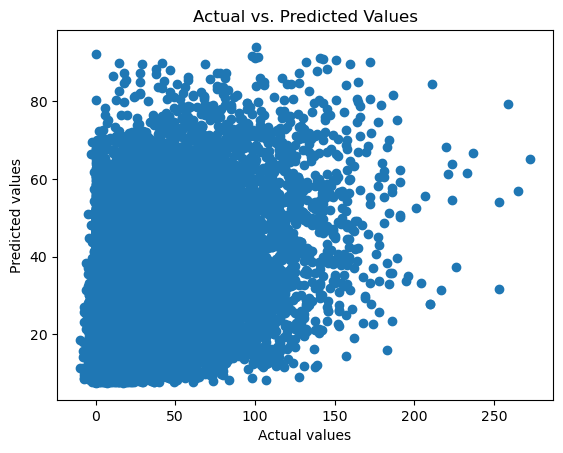

In [17]:
plt.scatter(y, y_hat)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.show()


While these results indicate that the model has some predictive power, it can be improved. Further analysis, feature engineering, and model tuning can help enhance performance.

In [18]:
def get_player_stats(player_id, df):
    player_stats = df[df['player_id'] == player_id].tail(10)
    return player_stats


In [19]:
def predict_receiving_yards(player_id, df, model):
    player_stats = get_player_stats(player_id, df)
    if len(player_stats) < 10:
        print("Not enough data for this player.")
        return None
    
    x = player_stats[['receptions_L10', 'targets_L10',
                      'receiving_air_yards_L10', 'receiving_yards_after_catch_L10',
                      'receiving_epa_L10', 'target_share_L10', 'wopr_L10','receiving_yards_L10']].values[-1].reshape(1, -1)
    
    prediction = model.predict(x)
    return prediction[0]


In [20]:
player_id = '00-0039075'  # Replace with the actual player ID
predicted_yards = predict_receiving_yards(player_id, df, regr)
print(f"Predicted receiving yards for player {player_id}: {predicted_yards}")


Predicted receiving yards for player 00-0039075: [55.24399931]


In [21]:
def get_player_id(player_name, df):
    player_id = df[df['player_display_name'] == player_name]['player_id'].values
    if len(player_id) == 0:
        print("Player not found.")
        return None
    return player_id[0]


In [22]:
def predict_receiving_yards_by_name(player_name, df, model):
    player_id = get_player_id(player_name, df)
    if player_id is None:
        return None
    
    player_stats = get_player_stats(player_id, df)
    if len(player_stats) < 10:
        print("Not enough data for this player.")
        return None
    
    x = player_stats[['receptions_L10', 'targets_L10',
                      'receiving_air_yards_L10', 'receiving_yards_after_catch_L10',
                      'receiving_epa_L10', 'target_share_L10', 'wopr_L10','receiving_yards_L10']].values[-1].reshape(1, -1)
    
    prediction = model.predict(x)
    return prediction[0]


In [23]:
player_name = 'Puka Nacua'  # Replace with the actual player name
predicted_yards = predict_receiving_yards_by_name(player_name, df, regr)
if predicted_yards is not None:
    print(f"Predicted receiving yards for {player_name}: {predicted_yards}")


Predicted receiving yards for Puka Nacua: [55.24399931]


In [24]:
player_name = 'Tyreek Hill'  # Replace with the actual player name
predicted_yards = predict_receiving_yards_by_name(player_name, df, regr)
if predicted_yards is not None:
    print(f"Predicted receiving yards for {player_name}: {predicted_yards}")


Predicted receiving yards for Tyreek Hill: [81.61539213]


In [25]:
player_name = 'Mark Andrews'  # Replace with the actual player name
predicted_yards = predict_receiving_yards_by_name(player_name, df, regr)
if predicted_yards is not None:
    print(f"Predicted receiving yards for {player_name}: {predicted_yards}")


Predicted receiving yards for Mark Andrews: [48.98784464]


In [26]:
player_name = 'Diontae Johnson'  # Replace with the actual player name
predicted_yards = predict_receiving_yards_by_name(player_name, df, regr)
if predicted_yards is not None:
    print(f"Predicted receiving yards for {player_name}: {predicted_yards}")


Predicted receiving yards for Diontae Johnson: [50.46055013]


In [27]:
player_name = 'Jaylen Waddle'  # Replace with the actual player name
predicted_yards = predict_receiving_yards_by_name(player_name, df, regr)
if predicted_yards is not None:
    print(f"Predicted receiving yards for {player_name}: {predicted_yards}")


Predicted receiving yards for Jaylen Waddle: [65.22968499]


In [28]:
player_name = 'CeeDee Lamb'  # Replace with the actual player name
predicted_yards = predict_receiving_yards_by_name(player_name, df, regr)
if predicted_yards is not None:
    print(f"Predicted receiving yards for {player_name}: {predicted_yards}")


Predicted receiving yards for CeeDee Lamb: [88.10203302]


In [29]:
player_name = "Ja'Marr Chase"  # Replace with the actual player name
predicted_yards = predict_receiving_yards_by_name(player_name, df, regr)
if predicted_yards is not None:
    print(f"Predicted receiving yards for {player_name}: {predicted_yards}")


Predicted receiving yards for Ja'Marr Chase: [60.49649359]


In [30]:
player_name = 'Amon-Ra St. Brown'  # Replace with the actual player name
predicted_yards = predict_receiving_yards_by_name(player_name, df, regr)
if predicted_yards is not None:
    print(f"Predicted receiving yards for {player_name}: {predicted_yards}")


Predicted receiving yards for Amon-Ra St. Brown: [70.29575311]


In [31]:
player_name = 'Garrett Wilson'  # Replace with the actual player name
predicted_yards = predict_receiving_yards_by_name(player_name, df, regr)
if predicted_yards is not None:
    print(f"Predicted receiving yards for {player_name}: {predicted_yards}")


Predicted receiving yards for Garrett Wilson: [62.37475478]


In [32]:
player_name = 'Najee Harris'  # Replace with the actual player name
predicted_yards = predict_receiving_yards_by_name(player_name, df, regr)
if predicted_yards is not None:
    print(f"Predicted receiving yards for {player_name}: {predicted_yards}")


Predicted receiving yards for Najee Harris: [14.64391913]


In [33]:
player_name = 'George Pickens'  # Replace with the actual player name
predicted_yards = predict_receiving_yards_by_name(player_name, df, regr)
if predicted_yards is not None:
    print(f"Predicted receiving yards for {player_name}: {predicted_yards}")


Predicted receiving yards for George Pickens: [52.07732695]


In [34]:
player_name = 'Pat Freiermuth'  # Replace with the actual player name
predicted_yards = predict_receiving_yards_by_name(player_name, df, regr)
if predicted_yards is not None:
    print(f"Predicted receiving yards for {player_name}: {predicted_yards}")


Predicted receiving yards for Pat Freiermuth: [32.08247112]
